# Naive Bayes on Amazon Food Reviews

Dataset Source: https://www.kaggle.com/snap/amazon-fine-food-reviews

The Amazon Fine Food Reviews dataset consists of reviews of the fine food from Amazon.

Timespan: Oct 1999 - Oct 2012
Total Number of Reviews: 568,454
Total Number of Users: 256,059
Total Number of Products: 74,258
Total Number of Profile Name: 218,418

Number of attributes/columns: 10

Attributes/Columns:

1. Id: Row Id
2. ProductId: Unique identifier for the product
3. UserId: Unqiue identifier for the user
4. ProfileName: Profile name of the user
5. HelpfulnessNumerator: Number of users who found the review helpful
6. HelpfulnessDenominator: Number of users who indicated whether they found the review helpful or not
7. Score: Rating between 1 and 5
8. Time: Timestamp for the review
9. Summary: Brief summary of the review
10. Text: Text of the review

**Aim: Convert all the reviews into a vector using two techniques:**
1. Binary BoW
2. TFIDF

**Then perform following tasks under each technique:**
1. Split dataset in train and test data in ratio of 80:20.
2. Apply Random Forest and check accuracy.


# Loading the data

The dataset is available in two forms on kaggle:

1. .csv file

2. SQLite Database

To load data, I have used SQLite dataset as it is easier to query and visualise the data.Here I have to classifiy the sentiment into positive and negative, so I will ignore all the reviews with Scores equal to 3.If the Score is greater than 3 then it is positive otherwise it is negative.

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
conn=sqlite3.connect('CleanedAmazonFoodReviewDataset.sqlite')

In [3]:
dataset=pd.read_sql_query("SELECT * FROM REVIEWS",conn)

In [4]:
dataset.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ProcessedText
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,Positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,have bought sever the vital can dog food produ...
1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,Negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arriv label jumbo salt peanutsth peanu...
2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,Positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,this confect that has been around few centuri ...
3,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,Positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffi great price there was wide assort ...
4,5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,Positive,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,got wild hair for taffi and order this five po...


In [5]:
dataset.shape

(364171, 12)

In [6]:
dataset["Score"].value_counts()

Positive    307061
Negative     57110
Name: Score, dtype: int64

In [7]:
def changeScore(score):
    if(score=="Positive"):
        return 1
    else:
        return 0

In [8]:
scores=list(dataset["Score"])

In [9]:
convertedScore=list(map(changeScore,scores))

In [10]:
convertedScore[:10]

[1, 0, 1, 1, 1, 1, 1, 1, 1, 1]

In [11]:
dataset["Score"]=convertedScore

In [12]:
dataset.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ProcessedText
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,have bought sever the vital can dog food produ...
1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arriv label jumbo salt peanutsth peanu...
2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,this confect that has been around few centuri ...
3,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffi great price there was wide assort ...
4,5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,1,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,got wild hair for taffi and order this five po...


In [13]:
data_10000 = dataset.sample(n = 10000)

In [14]:
data_10000.shape

(10000, 12)

In [15]:
data_10000.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ProcessedText
59100,82896,90227,B00866AM2G,AHUO32JRC3NZG,Betty,0,0,0,1347235200,uck,I had this brand before a few years ago. I do...,had this brand befor few year ago dont know wh...
359508,520263,562474,B003VZ7W52,A33OOC8GQCLLHI,Earl,6,11,0,1295308800,expensive!,I do like Cheerios and I like the honey nut th...,like cheerio and like the honey nut the best j...
64469,90809,98786,B008ADQSO6,A7KZSX89SI88W,"doccyn ""threewhales""",0,0,1,1345248000,My first Matcha!,This is a good entry level Matcha. It is not b...,this good entri level matcha not bitter grassi...
143903,204513,221566,B0045IJR3O,A237QFXXVR2SU1,"Delores McCarter ""mizdmc""",1,1,1,1343692800,Amazing Little Mushrooms,"I admit, I was a little skeptical about how th...",admit was littl skeptic about how these mushro...
260428,377320,408013,B000H7F5IS,AML0KYF16V8CU,TXP,4,6,0,1228435200,Would You Like Some Grape Leaves With Your Salt?,I've been eating stuffed grape leaves for deca...,ive been eat stuf grape leav for decad and the...


In [16]:
finalSortedDataFrame10000=data_10000.sort_values('Time',inplace=False,axis=0,ascending=True)

In [17]:
finalSortedDataFrame10000.shape

(10000, 12)

In [18]:
finalSortedDataFrame10000.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ProcessedText
238716,346114,374420,B00004CI84,A1ZH086GZYL5MZ,Doug DeBolt,2,2,1,1013385600,"A little gross, a lot of fun",Michael Keaton was already on his way to being...,michael keaton was alreadi his way be major st...
97343,137929,149697,B00006L2ZT,A2RSOEBCK1K70S,G. Preston,19,21,1,1036627200,Boxed Evolution,Long live Camper Van Beethoven!! This is a ble...,long live camper van beethoven this bless for ...
268946,390522,422248,B0000D9N9A,A3LFT71N1YOQXN,Bell Mays,14,16,1,1068422400,Hot Sizzling bubbly Raclette! ! Bubbly Bubbly...,Put in under a Reclette grill or just put it i...,put under reclett grill just put your oven for...
43518,62127,67497,B0000D9N7U,AQFIH82DRPMW,Patrick O'Brien,26,26,1,1068940800,Try It!,"If you've never had real Swiss fondue, you're ...",youv never had real swiss fondu your realli mi...
263492,381398,412394,B0000SWZX2,AHRB89BJ5QF78,Helen Lenoir,3,4,1,1069372800,loved the aroma,I can recommend this coffee. It smells like th...,can recommend this coffe smell like the coffe ...


In [19]:
finalSortedDataFrameScore10000=data_10000["Score"]

In [20]:
finalSortedDataFrameScore10000.shape

(10000,)

In [21]:
finalSortedDataFrameScore10000.head()

59100     0
359508    0
64469     1
143903    1
260428    0
Name: Score, dtype: int64

In [22]:
final_data=finalSortedDataFrame10000

In [23]:
final_data.shape

(10000, 12)

In [24]:
final_data_labels=finalSortedDataFrameScore10000

In [25]:
final_data_labels.shape

(10000,)

# 1. Binary BoW

In [26]:
positive_reviews=final_data[final_data["Score"]==1]
negative_reviews=final_data[final_data["Score"]==0]

In [27]:
positive_reviews.shape

(8465, 12)

In [28]:
negative_reviews.shape

(1535, 12)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
positive_bow_vector=CountVectorizer(stop_words="english")
positive_bow=positive_bow_vector.fit_transform(positive_reviews["ProcessedText"].values)

In [31]:
positive_bow.shape

(8465, 13587)

In [32]:
positive_features=positive_bow_vector.get_feature_names()
len(positive_features)

13587

In [33]:
c=[]
for i in range(len(positive_features)):
    t=positive_bow.getcol(i).sum()
    c.append(t)

In [34]:
len(c)

13587

In [35]:
positive_bow_dict=dict(zip(positive_features,c))

In [36]:
positive_bow_dict_sort=sorted(positive_bow_dict.items(),key=lambda positive_bow_dict: positive_bow_dict[1],reverse=True)

In [37]:
for i in range(100):
    print(positive_bow_dict_sort[i])

('like', 3815)
('tast', 3444)
('good', 3027)
('flavor', 2932)
('love', 2875)
('use', 2858)
('great', 2788)
('just', 2462)
('veri', 2450)
('product', 2448)
('tea', 2327)
('tri', 2291)
('make', 2094)
('coffe', 1980)
('food', 1793)
('time', 1558)
('realli', 1461)
('buy', 1446)
('eat', 1439)
('onli', 1382)
('price', 1324)
('order', 1306)
('amazon', 1282)
('dont', 1273)
('littl', 1273)
('best', 1247)
('becaus', 1138)
('store', 1131)
('bag', 1126)
('dog', 1111)
('ive', 1098)
('drink', 1095)
('mix', 1030)
('day', 1001)
('chocol', 985)
('ani', 959)
('better', 947)
('recommend', 939)
('year', 921)
('sugar', 899)
('cup', 897)
('sweet', 876)
('high', 869)
('water', 852)
('box', 823)
('treat', 810)
('delici', 804)
('look', 797)
('enjoy', 793)
('way', 781)
('want', 780)
('work', 767)
('packag', 765)
('brand', 747)
('think', 730)
('add', 727)
('purchas', 726)
('nice', 716)
('need', 713)
('favorit', 706)
('sinc', 694)
('bit', 689)
('thing', 685)
('snack', 683)
('perfect', 677)
('cat', 669)
('bought',

In [38]:
from wordcloud import WordCloud

In [39]:
def PlotWordCloud(frequency):
    wordCloudPlot=WordCloud(background_color="white",width=150,height=80)
    wordCloudPlot.generate_from_frequencies(frequencies=frequency)
    plt.figure(figsize=(15,10))
    plt.imshow(wordCloudPlot,interpolation="bilinear")
    plt.axis("off")
    plt.show()

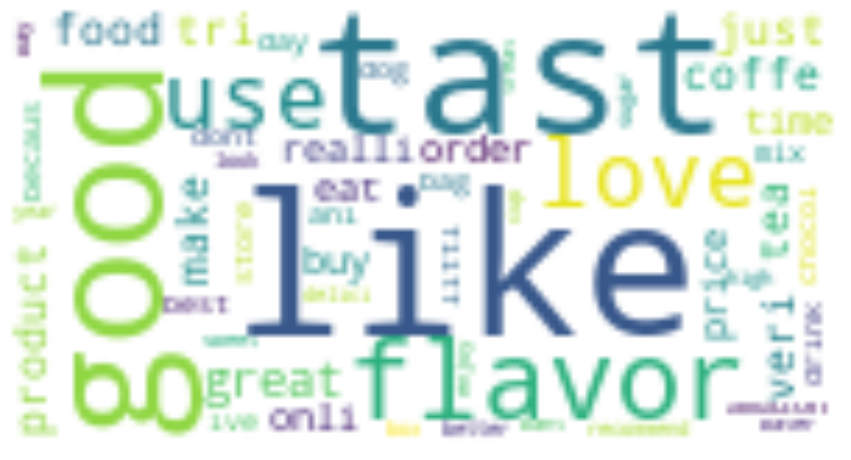

In [40]:
PlotWordCloud(positive_bow_dict)

In [41]:
negative_bow_vector=CountVectorizer(stop_words="english")
negative_bow=negative_bow_vector.fit_transform(negative_reviews['ProcessedText'].values)

In [42]:
negative_bow.shape

(1535, 5971)

In [43]:
negative_features=negative_bow_vector.get_feature_names()
len(negative_features)

5971

In [44]:
c=[]
for i in range(len(negative_features)):
    t=negative_bow.getcol(i).sum()
    c.append(t)

In [45]:
len(c)

5971

In [46]:
negative_dict=dict(zip(negative_features,c))

In [47]:
negative_dict_sort=sorted(negative_dict.items(),key=lambda negative_dict: negative_dict[1],reverse=True)

In [48]:
for i in range(100):
    print(negative_dict_sort[i])

('tast', 898)
('like', 815)
('product', 758)
('flavor', 511)
('tri', 495)
('just', 470)
('veri', 468)
('good', 396)
('use', 378)
('order', 377)
('coffe', 374)
('buy', 348)
('food', 332)
('box', 311)
('dont', 307)
('tea', 302)
('onli', 284)
('amazon', 277)
('becaus', 277)
('eat', 270)
('make', 264)
('bag', 254)
('time', 247)
('realli', 239)
('review', 235)
('purchas', 230)
('dog', 227)
('bought', 226)
('packag', 221)
('look', 219)
('better', 207)
('sugar', 204)
('ani', 200)
('did', 199)
('love', 190)
('disappoint', 188)
('ingredi', 187)
('bad', 186)
('price', 185)
('chocol', 183)
('way', 182)
('want', 177)
('think', 176)
('know', 175)
('drink', 173)
('store', 172)
('thought', 171)
('smell', 170)
('pack', 169)
('water', 168)
('littl', 166)
('mix', 166)
('brand', 161)
('great', 161)
('receiv', 160)
('got', 156)
('say', 155)
('ive', 154)
('cup', 148)
('money', 147)
('thing', 147)
('befor', 146)
('day', 143)
('differ', 142)
('item', 140)
('someth', 139)
('didnt', 136)
('work', 134)
('year',

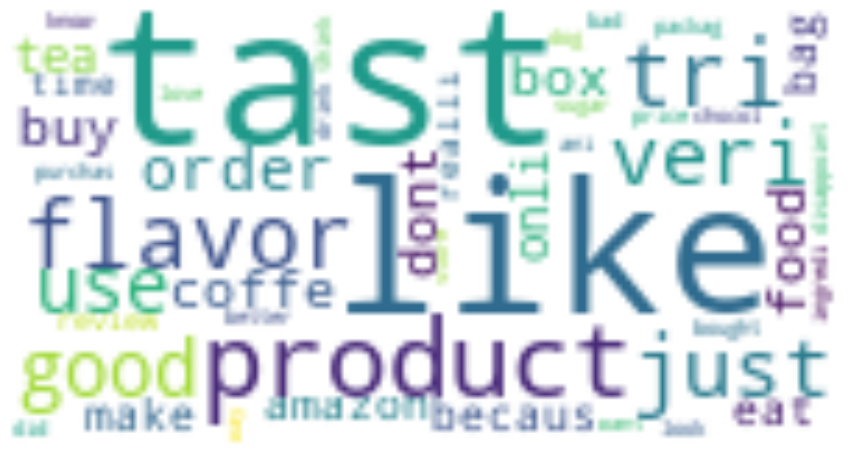

In [49]:
PlotWordCloud(negative_dict)

**Converting Rows to Binary BoW**

In [50]:
cv=CountVectorizer(binary=True)

In [51]:
final_data_BoW=cv.fit_transform(final_data['ProcessedText'].values)

In [52]:
final_data_BoW.shape

(10000, 15213)

**Splitting Data into train and test data in ratio of 80:20**

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(final_data_BoW,final_data_labels,test_size=0.2,random_state=42)

In [54]:
X_train.shape

(8000, 15213)

In [55]:
y_train.shape

(8000,)

In [56]:
X_test.shape

(2000, 15213)

In [57]:
y_test.shape

(2000,)

**BernoulliNB**

In [58]:
from sklearn.naive_bayes import BernoulliNB

In [59]:
nb=BernoulliNB()
nb.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [60]:
y_pred=nb.predict(X_test)

In [61]:
y_pred.shape

(2000,)

In [62]:
X_test.shape

(2000, 15213)

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [64]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8255

In [65]:
precision=precision_score(y_test,y_pred)
precision

0.8481078278900985

In [66]:
recall=recall_score(y_test,y_pred)
recall

0.966903073286052

In [67]:
f1score=f1_score(y_test,y_pred)
f1score

0.9036177851422259

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

**MultinomialNB**

In [69]:
from sklearn.naive_bayes import MultinomialNB

In [70]:
mnb=MultinomialNB()

In [71]:
mnb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [72]:
y_pred=mnb.predict(X_test)

In [73]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.826

In [74]:
recall=recall_score(y_test, y_pred)
recall

0.9728132387706856

In [75]:
precision=precision_score(y_test, y_pred)
precision

0.8449691991786448

In [76]:
f1score=f1_score(y_test, y_pred)
f1score

0.9043956043956044

In [77]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[   6,  302],
       [  46, 1646]], dtype=int64)

# 2. TFIDF

In [78]:
final_data.shape

(10000, 12)

In [79]:
final_data_labels.shape

(10000,)

In [80]:
positiveReviews=final_data[final_data['Score']==1]
negativeReviews=final_data[final_data['Score']==0]

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [82]:
tfidf_vector=TfidfVectorizer(ngram_range=(1,2))

In [83]:
final_data_tfidf=tfidf_vector.fit_transform(final_data['ProcessedText'].values)

In [84]:
final_data_tfidf.shape

(10000, 235464)

**Splitting Data into train and test data in ratio of 80:20**

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(final_data_tfidf,final_data_labels,test_size=0.2,random_state=42)

**BernoulliNB**

In [86]:
nb=BernoulliNB()

In [87]:
nb.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [88]:
y_pred=nb.predict(X_test)

In [89]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.826

In [90]:
recall=recall_score(y_test, y_pred)
recall

0.9722222222222222

In [91]:
precision=precision_score(y_test, y_pred)
precision

0.8453237410071942

In [92]:
f1score=f1_score(y_test, y_pred)
f1score

0.9043430456294668

In [93]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[   7,  301],
       [  47, 1645]], dtype=int64)

**MultinomialNB**

In [94]:
mnb=MultinomialNB()

In [95]:
mnb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [96]:
y_pred=mnb.predict(X_test)

In [97]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.846

In [98]:
recall=recall_score(y_test, y_pred)
recall

1.0

In [99]:
precision=precision_score(y_test, y_pred)
precision

0.846

In [100]:
f1score=f1_score(y_test, y_pred)
f1score

0.9165763813651137

In [101]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[   0,  308],
       [   0, 1692]], dtype=int64)

**Binary Bow**

Bernoulli Naive Bayes: Accuracy = 82.55%

Multinomial Naive Bayes: Accuracy = 82.6%



**TFIDF**

Bernoulli Naive Bayes: Accuracy = 82.6%

Multinomial Naive Bayes: Accuracy = 84.6%
